# EDA(Exploratory Data Analysis)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# 한글폰트 깨짐 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')  # 나눔바른고딕 폰트 설정

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
# 데이터를 dictionary 형태로 한번에 불러 올 수 있다.

data = {
    'tra':
    pd.read_csv('/content/gdrive/MyDrive/Aiffel/HAC/01/data/air_visit_data.csv'),
    'as':
    pd.read_csv('/content/gdrive/MyDrive/Aiffel/HAC/01/data/air_store_info.csv'),
    'hs':
    pd.read_csv('/content/gdrive/MyDrive/Aiffel/HAC/01/data/hpg_store_info.csv'),
    'ar':
    pd.read_csv('/content/gdrive/MyDrive/Aiffel/HAC/01/data/air_reserve.csv'),
    'hr':
    pd.read_csv('/content/gdrive/MyDrive/Aiffel/HAC/01/data/hpg_reserve.csv'),
    'id':
    pd.read_csv('/content/gdrive/MyDrive/Aiffel/HAC/01/data/store_id_relation.csv'),
    'tes':
    pd.read_csv('/content/gdrive/MyDrive/Aiffel/HAC/01/data/sample_submission.csv'),
    'hol':
    pd.read_csv('/content/gdrive/MyDrive/Aiffel/HAC/01/data/date_info.csv').rename(columns={
        'calendar_date': 'visit_date'
    })
}

# data_backup = copy.deepcopy(data)

참고자료 : https://www.kaggle.com/tunguz/surprise-me-2

## 일본의 공휴일
- 연간 공휴일은 16일이며 4월 말 ~ 5월 초 공휴일이 집중되어 있는 골든 위크 기간이 있는 것이 특징이다.
- __4월 29일(쇼와의 날)부터 5월 3일(헌법 기념일), 5월 4일(녹색의 날), 5월 5일(어린이날), 5월 6일 (대체 휴무일)__까지 연휴가 이어지는 주간을 __골든 위크__ 라고 부른다. 이 기간에는 회사 사정에 따라 8~10일간 쉴 수 있도록 하는 일본 최대의 연휴이다.

## Data Overview
- 제공된 데이터셋의 shape, describe, info 등을 활용해 개괄적인 정보를 확인한다.

### air_visit_data

In [ ]:
print(data['tra'].shape)
data['tra'].head()

(252108, 3)


,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [ ]:
data['tra'].describe(include='object')

,air_store_id,visit_date
count,252108,252108
unique,829,478
top,air_5c817ef28f236bdf,2017-03-17
freq,477,799


레스토랑의 개수는 총 829개 이다

In [ ]:
data['tra'].describe()

,visitors
count,252108.000000
mean,20.973761
std,16.757007
min,1.000000
25%,9.000000
50%,17.000000
75%,29.000000
max,877.000000


### air_reserve

In [ ]:
data['ar'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92378 entries, 0 to 92377
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   air_store_id      92378 non-null  object
 1   visit_datetime    92378 non-null  object
 2   reserve_datetime  92378 non-null  object
 3   reserve_visitors  92378 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [ ]:
print(data['ar'].shape)
data['ar'].head()

(92378, 4)


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


air_store의 예약정보(방문 시간, 예약 시점, 방문객수)를 알 수 있다.

In [ ]:
data['ar'].describe(include='object')

,air_store_id,visit_datetime,reserve_datetime
count,92378,92378,92378
unique,314,4975,7513
top,air_8093d0b565e9dbdf,2016-12-24 19:00:00,2016-11-24 18:00:00
freq,2263,255,106


예약 정보를 확인할 수 있는 레스토랑(air_store)은 총 314개 이다.

In [ ]:
data['ar'].describe()

,reserve_visitors
count,92378.000000
mean,4.481749
std,4.919669
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,100.000000


### hpg_reserve

In [ ]:
data['hr'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000320 entries, 0 to 2000319
Data columns (total 4 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   hpg_store_id      object
 1   visit_datetime    object
 2   reserve_datetime  object
 3   reserve_visitors  int64 
dtypes: int64(1), object(3)
memory usage: 61.0+ MB


In [ ]:
print(data['hr'].shape)
data['hr'].head()

(2000320, 4)


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


hpg_store의 예약정보(방문 시간, 예약 시점, 방문객수)를 알 수 있다.

In [ ]:
data['hr'].describe(include='object')

,hpg_store_id,visit_datetime,reserve_datetime
count,2000320,2000320,2000320
unique,13325,9847,11450
top,hpg_2afd5b187409eeb4,2016-12-16 19:00:00,2016-12-12 21:00:00
freq,1155,10528,907


예약 정보를 확인할 수 있는 레스토랑(hpg_store)은 총 13325개 이다.

In [ ]:
data['hr'].describe()

,reserve_visitors
count,2.000320e+06
mean,5.073785e+00
std,5.416172e+00
min,1.000000e+00
25%,2.000000e+00
50%,3.000000e+00
75%,6.000000e+00
max,1.000000e+02


### aif_store_info

In [ ]:

print(data['as'].shape)
data['as'].head()

(829, 5)


,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


air_store_info를 통해 요리 카테고리, 레스토랑 위치를 확인할 수 있다. 

In [ ]:
data['as'].describe(include='object')

,air_store_id,air_genre_name,air_area_name
count,829,829,829
unique,829,14,103
top,air_9105a29b0eb250d2,Izakaya,Fukuoka-ken Fukuoka-shi Daimyō
freq,1,197,64


In [ ]:
data['as'].describe()

,latitude,longitude
count,829.000000,829.000000
mean,35.647042,137.415311
std,2.084659,3.650971
min,33.211967,130.195555
25%,34.695124,135.341564
50%,35.658068,139.685474
75%,35.694003,139.751599
max,44.020632,144.273398


### hpg_store_info

In [ ]:
print(data['hs'].shape)
data['hs'].head()

(4690, 5)


,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


air_store_info를 통해  요리 카테고리, 레스토랑 위치를 확인할 수 있다. 

In [ ]:
data['hs'].describe(include='object')

,hpg_store_id,hpg_genre_name,hpg_area_name
count,4690,4690,4690
unique,4690,34,119
top,hpg_f30adae73356935a,Japanese style,Tōkyō-to Shinjuku-ku None
freq,1,1750,257


4690개의 레스토랑 정보를 확인할 수 있다.  
레스토랑의 종류는 34가지이며, 그 중 Japanese style의 레스토랑이 가장 많다.  
도쿄도 지역에 hpg_store가 가장 많이 있다.

In [ ]:
data['hs'].describe()

,latitude,longitude
count,4690.000000,4690.000000
mean,35.810261,137.675816
std,2.138755,3.197233
min,33.311645,130.339313
25%,34.692109,135.498859
50%,35.659214,139.495733
75%,35.703381,139.737998
max,43.774846,143.714585


### date_info

In [ ]:

print(data['hol'].shape)
data['hol'].head()

(517, 3)


,visit_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [ ]:
data['hol'].value_counts('holiday_flg')

holiday_flg
0    482
1     35
dtype: int64

해당 기간 중 휴일이 35번 있다.

### store_id_relation

In [ ]:
print(data['id'].shape)
data['id'].head()

(150, 2)


,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


150개의 레스토랑이 air_store_id 와 hpg_store_id 가 동시에 존재하는 경우이다

In [ ]:
# sample_submission
print(data['tes'].shape)
data['tes'].head()

(32019, 2)


,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0


### 결측치 확인

In [ ]:
data['tra'].isnull().sum()

air_store_id    0
visit_date      0
visitors        0
dtype: int64

In [ ]:
data['ar'].isnull().sum()

air_store_id        0
visit_datetime      0
reserve_datetime    0
reserve_visitors    0
dtype: int64

In [ ]:
data['hr'].isnull().sum()

hpg_store_id        0
visit_datetime      0
reserve_datetime    0
reserve_visitors    0
dtype: int64

In [ ]:
data['as'].isnull().sum()

air_store_id      0
air_genre_name    0
air_area_name     0
latitude          0
longitude         0
dtype: int64

In [ ]:
data['hs'].isnull().sum()

hpg_store_id      0
hpg_genre_name    0
hpg_area_name     0
latitude          0
longitude         0
dtype: int64

In [ ]:
data['hol'].isnull().sum()

visit_date     0
day_of_week    0
holiday_flg    0
dtype: int64

In [ ]:
data['id'].isnull().sum()

air_store_id    0
hpg_store_id    0
dtype: int64

분석하고자 하는 데이터셋은 결측치가 없는 것으로 확인된다.

## Data Visualization

### Restaurant Location Clustering

행정구역 상으로는 아니지만 일본의 영토는 전통적으로 아래와 같이 8개 지역으로 나뉘어진다고 합니다.  
우리는 이 8개의 지역을 기반으로 레스토랑의 위치를 Clustering 하겠습니다.

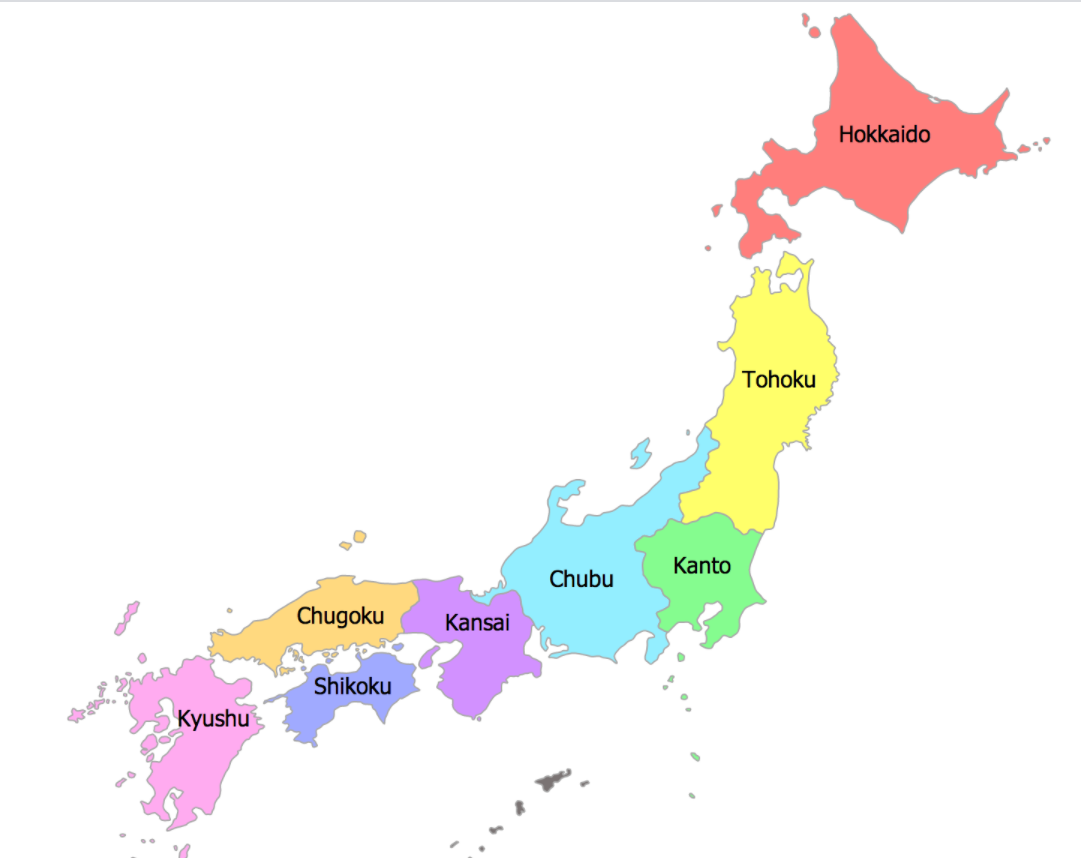

From north to south, the traditional regions are:

- __Hokkaidō__ (the island of Hokkaidō and nearby islands, population: 5,507,456, largest city: Sapporo)
- __Tōhoku__ region (northern Honshū, population: 9,335,088, largest city: Sendai)
- __Kantō__ region (eastern Honshū, population: 42,607,376, largest city: Tokyo)
- __Chūbu__ region (central Honshū, including Mt. Fuji, population: 21,714,995, largest city: Nagoya), sometimes divided into:
  - Hokuriku region (northwestern Chūbu, largest city: Kanazawa)
  - Kōshin'etsu region (northeastern Chūbu, largest city: Niigata)
    - Tōkai region (southern Chūbu, largest city: Nagoya)
- __Kansai__ or Kinki region (west-central Honshū, including the old capital, - - Kyoto, population: 22,755,030, largest city: Osaka)
- __Chūgoku__ region (western Honshū, population: 7,561,899, largest city: Hiroshima)
- __Shikoku__ (island, population: 3,977,205, largest city: Matsuyama)
- __Kyūshū__ (island, population: 14,596,977, largest city: Fukuoka) which includes:
  - Northern Kyushu: Fukuoka, Saga, Nagasaki and Ōita (largest city: Fukuoka)
  - Southern Kyushu: Kumamoto, Miyazaki and Kagoshima (largest city: Kagoshima)
  - Okinawa (largest city: Naha)

[참고문헌 : Kaggle_A Japanese Journey]('https://www.kaggle.com/asindico/a-japanese-journey')

__지역별 레스토랑 위치 시각화__

In [ ]:
# folium은 지도 시각화에 아주 유용한 모듈
import folium
from folium import plugins

In [ ]:
# 지역별 레스토랑 위치 지도 그리기
location = data['as'].groupby(['air_store_id', 'air_genre_name'])[['latitude', 'longitude']].mean().reset_index()
locationlist = location[['latitude', 'longitude']]  # 시각화를 위해 위도, 경도 정보가 필요하다
locationlist = locationlist.values.tolist()
map2 = folium.Map(location=[39, 139], 
                        tiles = "cartodbpositron", width=800, height=500,
                        zoom_start = 5)
marker_cluster=plugins.MarkerCluster().add_to(map2)
for point in range(0, len(location)):
    folium.Marker(locationlist[point], popup=location['air_genre_name'][point], 
    icon=folium.Icon(color='white', icon_color='red', 
                     #icon='fa fa-info-circle',
                     icon='fa fa-circle-o-notch fa-spin',
                     angle=0, 
                     prefix='fa')).add_to(marker_cluster)
map2

__지역별 레스토랑 현황__

Text(0, 0.5, '지역 구분')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 332 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 333 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 332 missing from current font.
  font.set_text(s, 0, flags=flags)


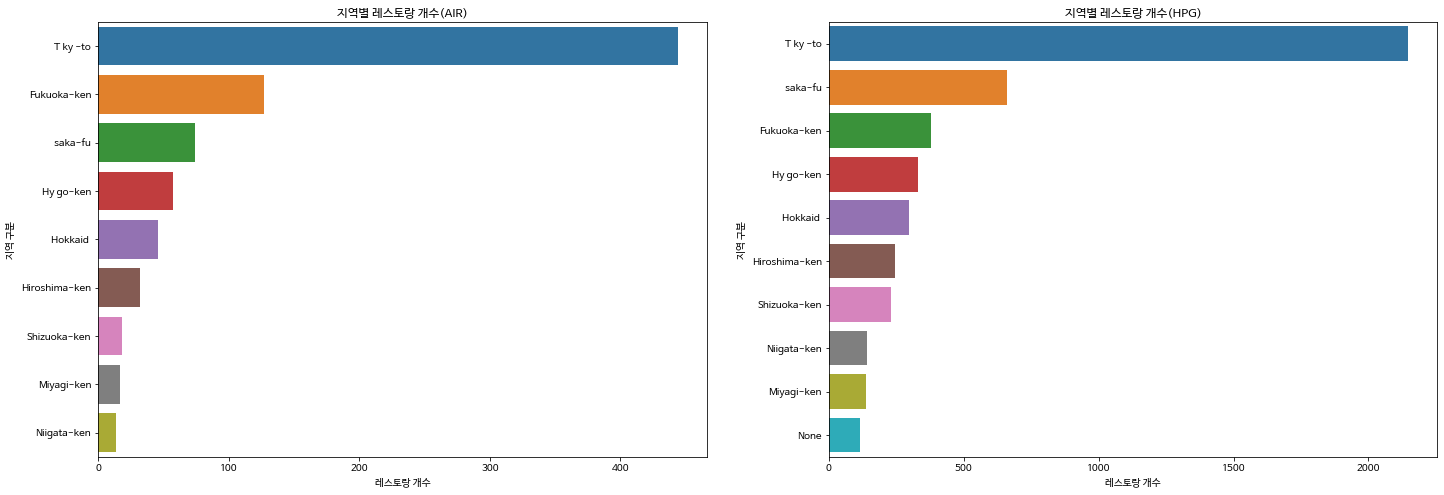

In [ ]:
# 지역별 레스토랑 개수(Air_store) 시각화
data['as']['air_area'] = data['as']['air_area_name'].str.split(' ').str[0]  # air_area_name 컬럼에서 ' ' 기준으로 문자열을 split한 뒤 첫번째 문자열을 가져와 'air_area'컬럼에 담아준다.
air_res = data['as'].groupby(['air_area'], as_index=False)['air_store_id'].count().sort_values('air_store_id', ascending=False)

f,ax = plt.subplots(1,2, figsize=(24,8)) 
sns.barplot(data=air_res, x='air_store_id', y='air_area', ax=ax[0]) 
ax[0].set_title('지역별 레스토랑 개수(AIR)')
ax[0].set_xlabel('레스토랑 개수')
ax[0].set_ylabel('지역 구분')

# 지역별 레스토랑 개수(HPG_store) 시각화
data['hs']['hpg_area'] = data['hs']['hpg_area_name'].str.split(' ').str[0]
data['hs']['hpg_area'].replace('Osaka', 'Ōsaka-fu', inplace=True)
data['hs']['hpg_area'].replace('Kanagawa-ken', 'Tōkyō-to', inplace=True) # 간토 지방 -> 도쿄로 분류
data['hs']['hpg_area'].replace('Saitama-ken', 'Tōkyō-to', inplace=True) # 간토 지방 -> 도쿄로 분류
# 미해결 : 결측치가 없다고 생각했는데 area의 'None' 형태의 str 데이터가 있었다. 이를 추가로 drop 해주면 좋을 것 같다.
# data['hs'].loc[data['hs'].hpg_area == 'Kanagawa-ken']

hpg_res = data['hs'].groupby(['hpg_area'], as_index=False)['hpg_store_id'].count().sort_values('hpg_store_id', ascending=False) 

sns.barplot(data=hpg_res, x='hpg_store_id', y='hpg_area', ax=ax[1])
ax[1].set_title('지역별 레스토랑 개수(HPG)')
ax[1].set_xlabel('레스토랑 개수')
ax[1].set_ylabel('지역 구분')

__시사점__
- 지역별로 레스토랑의 개수를 시각화 해보았는데 전처리 시 추가적으로 지역별로 어떤 genre의 레스토랑이 있는지도 확인해볼 필요가 있을 것 같다.
- HPG 플랫폼에 지역 정보가 None 값이 존재한다. 문자열로 되어 있어 결측치 집계 시엔 집계 되지 않았는데 개수가 많지 않아 필요 시 drop해도 될 것 같다.

__지역별 레스토랑 방문객수__

In [ ]:
air = pd.merge(data['ar'], data['as'], how='inner', on='air_store_id')
hpg = pd.merge(data['hr'], data['hs'], how='inner', on='hpg_store_id')
rel = data['id']
air_rel = pd.merge(air, rel, how='left', on='air_store_id')
hpg_rel = pd.merge(hpg, rel, how='left', on='hpg_store_id')
full = pd.merge(air_rel, hpg_rel, how='outer')

In [ ]:
# KMeans 클러스터링 기법을 활용해 위도, 경도 지표를 가지고 지역별로 clsutering 해준다.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(full[['longitude', 'latitude']])
full['cluster'] = kmeans.predict(full[['longitude', 'latitude']])

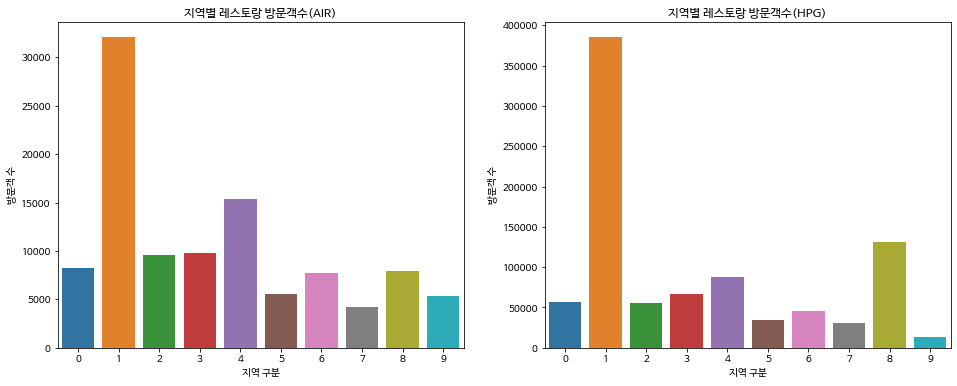

In [ ]:
# 지역별 레스토랑 방문횟수
f, ax = plt.subplots(1,2, figsize=(16,6))
hist_clust = full.groupby(['cluster'],as_index=False).count()

sns.barplot(x=hist_clust.cluster, y=hist_clust.air_store_id, ax=ax[0])
ax[0].set_title('지역별 레스토랑 방문객수(AIR)')
ax[0].set_xlabel('지역 구분')
ax[0].set_ylabel('방문객 수')

sns.barplot(x=hist_clust.cluster, y=hist_clust.hpg_store_id, ax=ax[1])
ax[1].set_title('지역별 레스토랑 방문객수(HPG)')
ax[1].set_xlabel('지역 구분')
ax[1].set_ylabel('방문객 수')

plt.show()

  __시사점__
  - AIR : 도쿄, 후쿠오카, 니가타 순으로 방문객 수가 많다. 
  - HPG :  도쿄, 오사카, 후쿠오카 순으로 방문객 수가 많다.
  - 지역별 레스토랑 수와 방문객 수가 비례 관계 있는 것으로 보인다.
  - 추가적으로 해당 지역의 인구 규모 대비 방문객 수를 체크해볼 수 있을 것 같다.

__< 지역 클러스터 값 정보 >__
- Cluster 0 : Hiroshima
- Cluster 1 : Tokyo
- Cluster 2 : Hokkaido Sapporo
- Cluster 3 : Hyogo
- Cluster 4 : Fukuoka
- Cluster 5 : Niigata
- Cluster 6 : Shizuoka
- Cluster 7 : Miyagi
- Cluster 8 : Osaka
- Cluster 9 : Hokkaido Asahikawa

### Store ID 정보

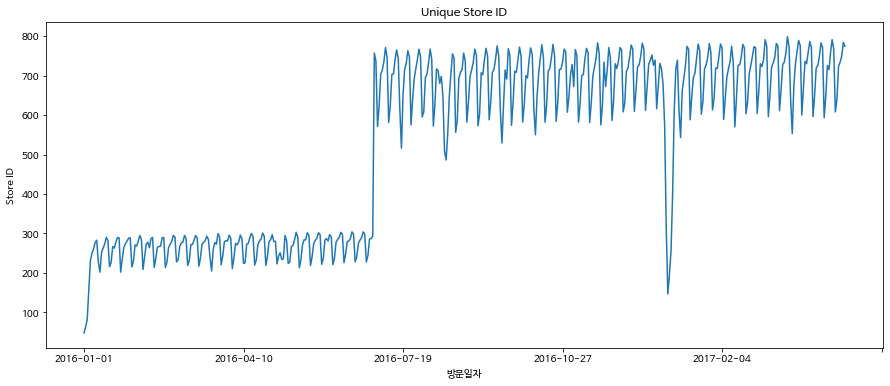

In [ ]:
f,ax = plt.subplots(1,1, figsize=(15,6))
stores = data['tra'].groupby(['visit_date'])['air_store_id'].size()
stores.plot(kind='line', ax=ax)
plt.xlabel("방문일자")
plt.ylabel("Store ID")
plt.title("Unique Store ID")
plt.show()

__시사점__ 
- AirREGI(이하 'AIR') 방문자 DB가 담겨있는 테이블이다.
- 약 800여개의 Store ID 정보가 있는데 __2016년 7월을 기점으로 Store ID 숫자가 급증__하였다. 이는 새로 문을 연 레스토랑이 많아졌다기 보다는 해당 플랫폼을 이용하는 레스토랑의 숫자가 많아졌다고 예측해볼 수 있다.
- 반면에 __2017년 1월에 Store ID 숫자가 급감__하였는데 이는 해당 기간에는 문을 닫았다는 것으로 추측할 수 있는데 __골든위크 기간의 방문자 데이터 예측 시 이상치__로 볼 수 있는 정보인 것 같다.
- 그래프에서의 진폭은 주기적인 것으로 보아 평일/주말의 영향으로 인해 생긴 것으로 생각된다.

### 일자별 방문 고객 및 예약 현황

__간단한 전처리__

In [ ]:
data['tra'] = pd.merge(data['tra'], data['as'], how='left', on=['air_store_id'])  # air_store_id 기준 merge air_store_info 조인
data['tra'] = pd.merge(data['tra'], data['hol'], how='left', on=['visit_date'])
data['tra'].sort_values(by='visit_date', ignore_index=True, inplace=True)
data['tra']['visit_date'] = pd.to_datetime(data['tra']['visit_date'])
data['tra']['dow'] = data['tra']['visit_date'].dt.dayofweek  # dt.dayofweek : 날짜를 요일로 변환, Monday(0)부터 시작
                                                             # 미해결 : dow 숫자값을 문자값(월/화/수~) 형태로 변환해주어야함 
data['tra']['year'] = data['tra']['visit_date'].dt.year  # dt.year : 날짜에서 연도 반환(yyyy)
data['tra']['month'] = data['tra']['visit_date'].dt.month  # dt.month : 날짜에서 월 반환(mm)
data['tra']['day'] = data['tra']['visit_date'].dt.day  # dt.day : 날짜에서 일자 반환(dd)
data['tra']['visit_date'] = data['tra']['visit_date'].dt.date  # dt.date : yyyy-mm-dd 로 변환(object)

In [ ]:
data['ar'] = pd.merge(data['ar'], data['as'], how='left', on=['air_store_id'])
data['ar']['visit_datetime'] = pd.to_datetime(data['ar']['visit_datetime'])
data['ar']['visit_hour'] = data['ar']['visit_datetime'].dt.hour  # dt.hour : 날짜에서 시간만 반환
data['ar']['visit_date'] = data['ar']['visit_datetime'].dt.date  # dt.date : yyyy-mm-dd 로 변환(object)
data['ar']['reserve_datetime'] = pd.to_datetime(data['ar']['reserve_datetime'])
data['ar']['reserve_hour'] = data['ar']['reserve_datetime'].dt.hour  
data['ar']['reserve_date'] = data['ar']['reserve_datetime'].dt.date 
# 실제 방문시간-예약시점 차이
data['ar']['reserve_visit_diff'] = data['ar'].apply(lambda r: (r['visit_datetime'] - r['reserve_datetime']).days, axis=1)
data['ar'].rename(columns={'reserve_visitors':'air_reserve_visitors'}, inplace=True) 

In [ ]:
data['hr'] = pd.merge(data['hr'], data['id'], how='inner', on=['hpg_store_id'])
data['hr'] = pd.merge(data['hr'], data['hs'], how='left', on=['hpg_store_id'])
data['hr']['visit_datetime'] = pd.to_datetime(data['hr']['visit_datetime'])
data['hr']['visit_hour'] = data['hr']['visit_datetime'].dt.hour  # dt.hour : 날짜에서 시간만 반환
data['hr']['visit_date'] = data['hr']['visit_datetime'].dt.date  # dt.date : yyyy-mm-dd 로 변환(object)
data['hr']['reserve_datetime'] = pd.to_datetime(data['ar']['reserve_datetime'])
data['hr']['reserve_hour'] = data['hr']['reserve_datetime'].dt.hour  
data['hr']['reserve_date'] = data['hr']['reserve_datetime'].dt.date 
# 실제 방문시간-예약시점 차이
data['hr']['reserve_visit_diff'] = data['hr'].apply(lambda r: (r['visit_date'] - r['reserve_date']).days, axis=1) 
data['hr'].rename(columns={'reserve_visitors':'hpg_reserve_visitors'}, inplace=True) 
# 미해결 : 시각화 하지 못함

__일별 방문/예약 현황__

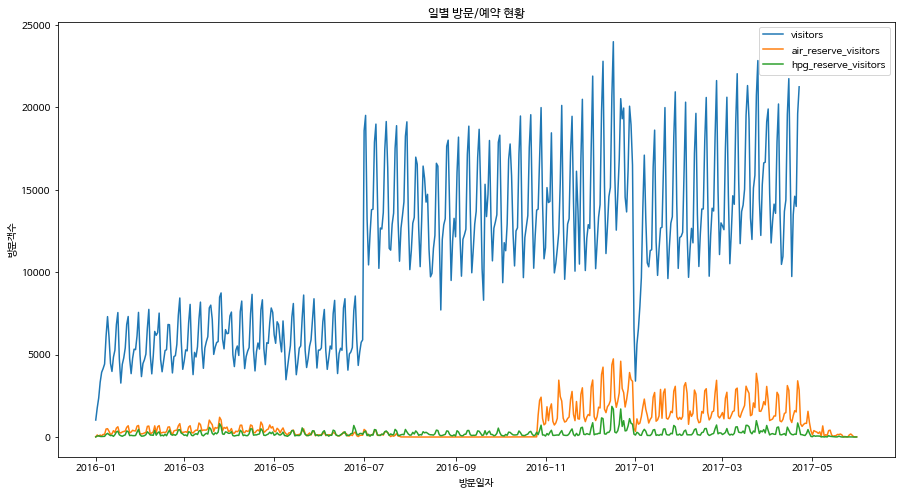

In [ ]:
f,ax = plt.subplots(1,1,figsize=(15, 8))
plt1 = data['tra'].groupby('visit_date', as_index=False)['visitors'].sum()
plt1.plot(x='visit_date', y='visitors', ax=ax)

plt2 = data['ar'].groupby('visit_date', as_index=False)['air_reserve_visitors'].sum()
plt2.plot(x='visit_date', y='air_reserve_visitors', ax=ax)

plt3 = data['hr'].groupby('visit_date', as_index=False)['hpg_reserve_visitors'].sum()  
plt3.plot(x='visit_date', y='hpg_reserve_visitors', ax=ax)

plt.xlabel('방문일자')
plt.ylabel('방문객수')
plt.title('일별 방문/예약 현황')
plt.show()

__시사점__
- 앞에서 언급했던 2016년 7월 Store ID 증가와 더불어 실제 방문객 수가 급증한 것으로 보아 예약 시스템에 새로운 식당의 추가, 방문자 집계 시스템 개편. 예약 프로모션 등의 이슈가 있었을 것으로 예상된다.  
- 2017년 1월도 마찬가지로 방문객 수가 감소한 것으로 보아 연말/연초에 문을 닫았던 레스토랑이 많은 것으로 예상된다.
- HPG를 통한 예약보다 AIR를 통한 예약 수가 더 많다.
- 그래프를 통해 예약 데이터가 실제 방문자 수에 비해 저조한 것을 볼 수 있다. __즉, 예약을 통한 방문객 보다 워크인(Walk-in) 방문객이 더 많은 것을 알 수 있다.__
- 해당 데이터를 가지고 예약 No-show, 재방문 여부 등에 대한 정보를 파악할 수는 없다.

### 방문객수 현황

__월별/일자별 방문객 수__

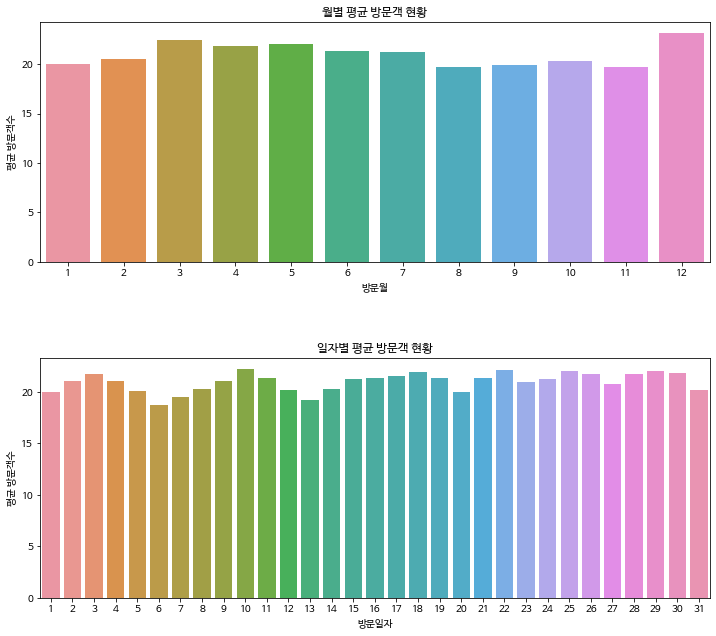

In [ ]:
f,ax = plt.subplots(2,1,figsize=(12, 10))
month_vis = data['tra'].groupby('month', as_index=False)['visitors'].mean()
sns.barplot(data=month_vis, x='month', y='visitors', ax=ax[0])
ax[0].set_xlabel('방문월')
ax[0].set_ylabel('평균 방문객수')
ax[0].set_title('월별 평균 방문객 현황')

temp = data['tra'].groupby('day', as_index=False)['visitors'].mean()
sns.barplot(data=temp, x='day', y='visitors', ax=ax[1])
ax[1].set_xlabel('방문일자')
ax[1].set_ylabel('평균 방문객수')
ax[1].set_title('일자별 평균 방문객 현황')

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.4)
plt.show()

__시사점__
- 월별 방문객 현황  
  - 월별로 확인했을 때 방문객 수가 가장 많은 달은 12월이다. (송년회 영향이라고 추측 해본다.) 
  - 12월 다음으로는 봄(3~5월)이 방문객 수가 많다. 4월 말 ~ 5월 초 골든 위크의 영향이 어느정도 있지 않을까 예상된다.

- 일자별 방문객 현황  
  - __평균적으로 매월 3일, 10일, 22일이 평균 방문객 수가 가장 높다.__
  - 평균적으로 매월 6일, 13일, 20일, 31일 방문객 수가 감소하고 있다.

__요일/공휴일 여부에 따른 방문객 수__

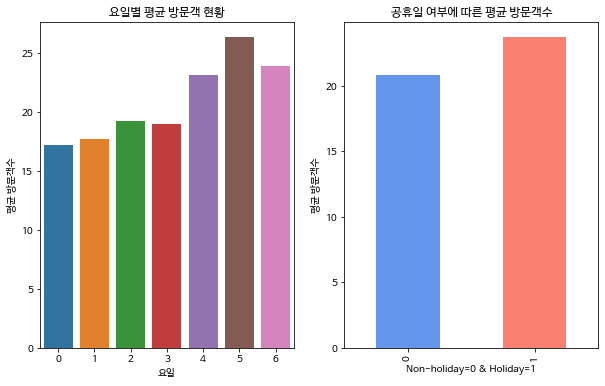

In [ ]:
f,ax = plt.subplots(1,2,figsize=(18, 6))
dow_vis = data['tra'].groupby('dow', as_index=False)['visitors'].mean()
sns.barplot(data=dow_vis, x='dow', y='visitors', ax=ax[0])
# plt1.plot.bar(x='dow', ax=ax)
ax[0].set_xlabel('요일')
ax[0].set_ylabel('평균 방문객수')
ax[0].set_title('요일별 평균 방문객 현황')

temp = data['tra'].groupby('holiday_flg')['visitors'].mean()
temp.plot.bar(x='holiday_flg', y='visitors', color=['cornflowerblue', 'salmon'], figsize=(10,6), ax=ax[1])
ax[1].set_xlabel('Non-holiday=0 & Holiday=1')
ax[1].set_ylabel('평균 방문객수')
ax[1].set_title('공휴일 여부에 따른 평균 방문객수')

plt.show()  #? 숫자로 된 요일을 문자열로 바꾸는법

__시사점__
- 요일별 방문객 현황  
  - 상식적으로 생각할 수 있는 예상대로 평일(월-목) 보다 주말(금-일)의 방문객 수가 많다.
  - 방문객 수가 가장 많은 날은 토요일이다.
- 공휴일 여부에 따른 방문객 현황
  - holiday 의 방문객 수가 상대적으로 많다는 것은 holiday에도 레스토랑들은 가게 문을 닫지 않고 영업을 한다고 볼 수 있다.
  - __공휴일의 경우 평일인 경우도 있기 때문에 데이터 전처리 시 공휴일이 있는 기간에 대한 방문객수 추이를 좀 더 유심있게 관찰해 볼 필요가 있을 것 같다.__

### 방문시간 현황

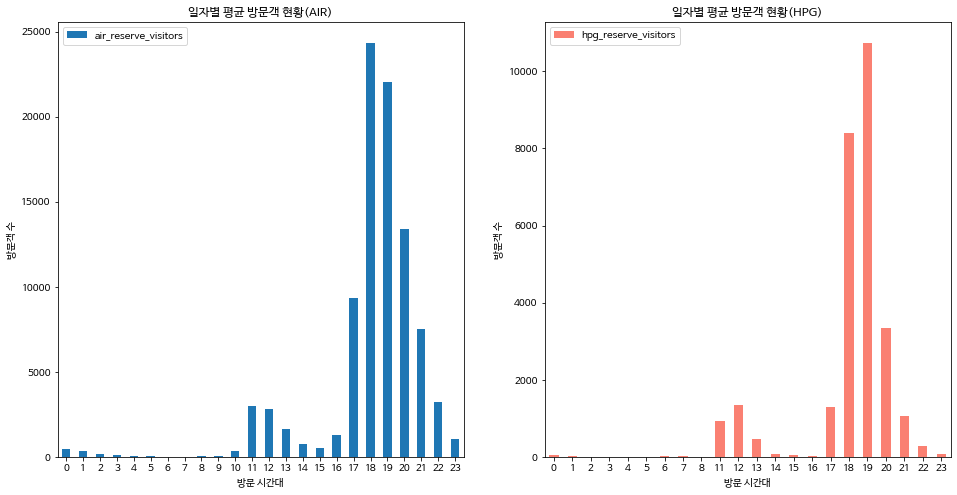

In [ ]:
f, ax = plt.subplots(1,2, figsize=(16,8))
vis_time1 = data['ar'].groupby(['visit_hour'])['air_reserve_visitors'].count().to_frame()
vis_time1.plot(kind='bar', ax=ax[0])
ax[0].set_title('일자별 평균 방문객 현황(AIR)')
ax[0].set_xlabel('방문 시간대')
ax[0].set_ylabel('방문객 수')
ax[0].tick_params(axis='x', labelrotation=0)

vis_time2 = data['hr'].groupby(['visit_hour'])['hpg_reserve_visitors'].count().to_frame()
vis_time2.plot(kind='bar', color='salmon', ax=ax[1])
ax[1].set_title('일자별 평균 방문객 현황(HPG)')
ax[1].set_xlabel('방문 시간대')
ax[1].set_ylabel('방문객 수')
ax[1].tick_params(axis='x', labelrotation=0)

plt.show()

__시사점__
- 저녁 시간대인 18시에서 20시 사이에 방문객 수가 가장 많은 것을 확인할 수 있다.

### 장르별 레스토랑 현황

__장르별 레스토랑 Market share__

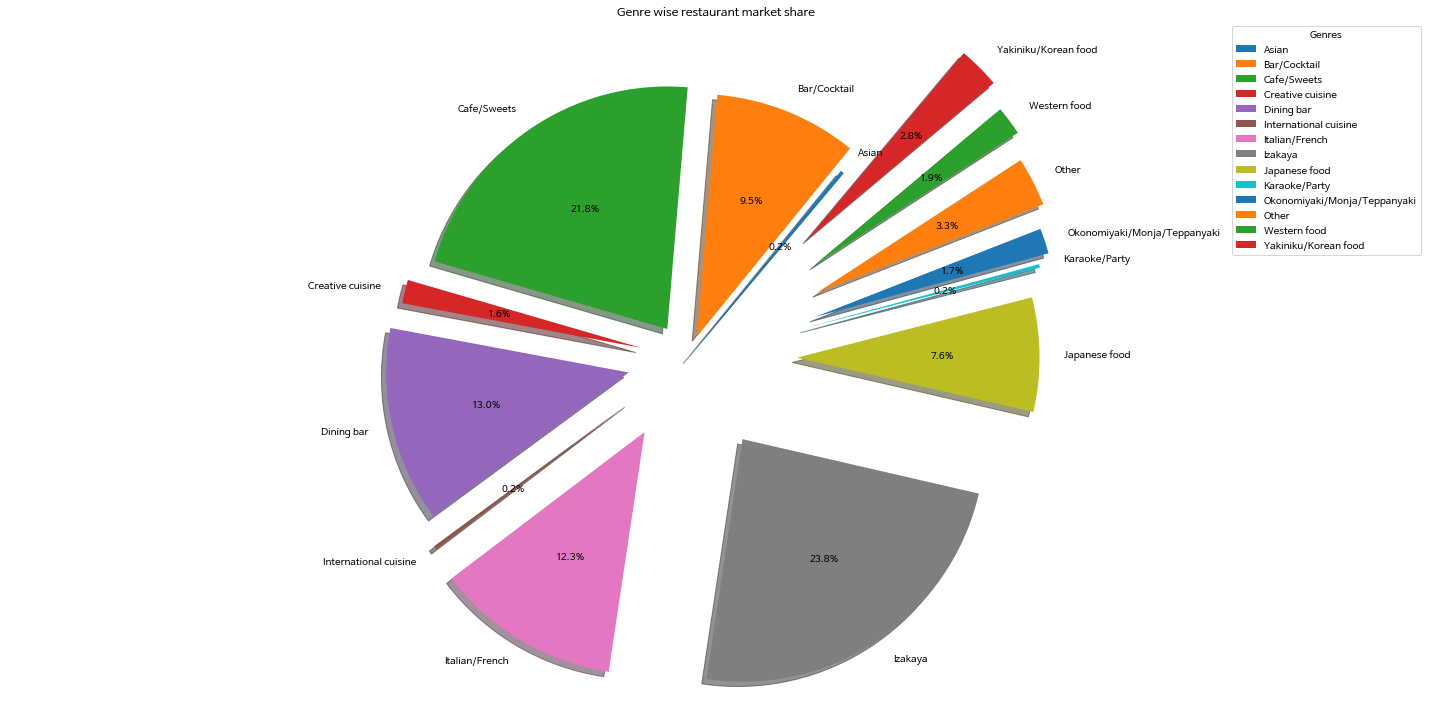

In [ ]:
temp =data['as'].groupby(['air_genre_name'],as_index=False)['air_store_id'].count()
labels = temp.air_genre_name.values
sizes = temp.air_store_id.values
explode = (0, 0.1, 0.15, 0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7)  
f,ax = plt.subplots(figsize=(20,10))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=50)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.legend(title='Genres')
plt.title('Genre wise restaurant market share')
plt.show()

__시사점__
- 레스토랑을 14개의 카테고리로 분류하고 있다. 
- 이자카야가 23.8%로 가장 많은 비중을 차지하며, 다음으로 카페/디저트가 21.8%를 차지하고 있다.

__장르별 레스토랑 분류(AIR vs. HPG)__

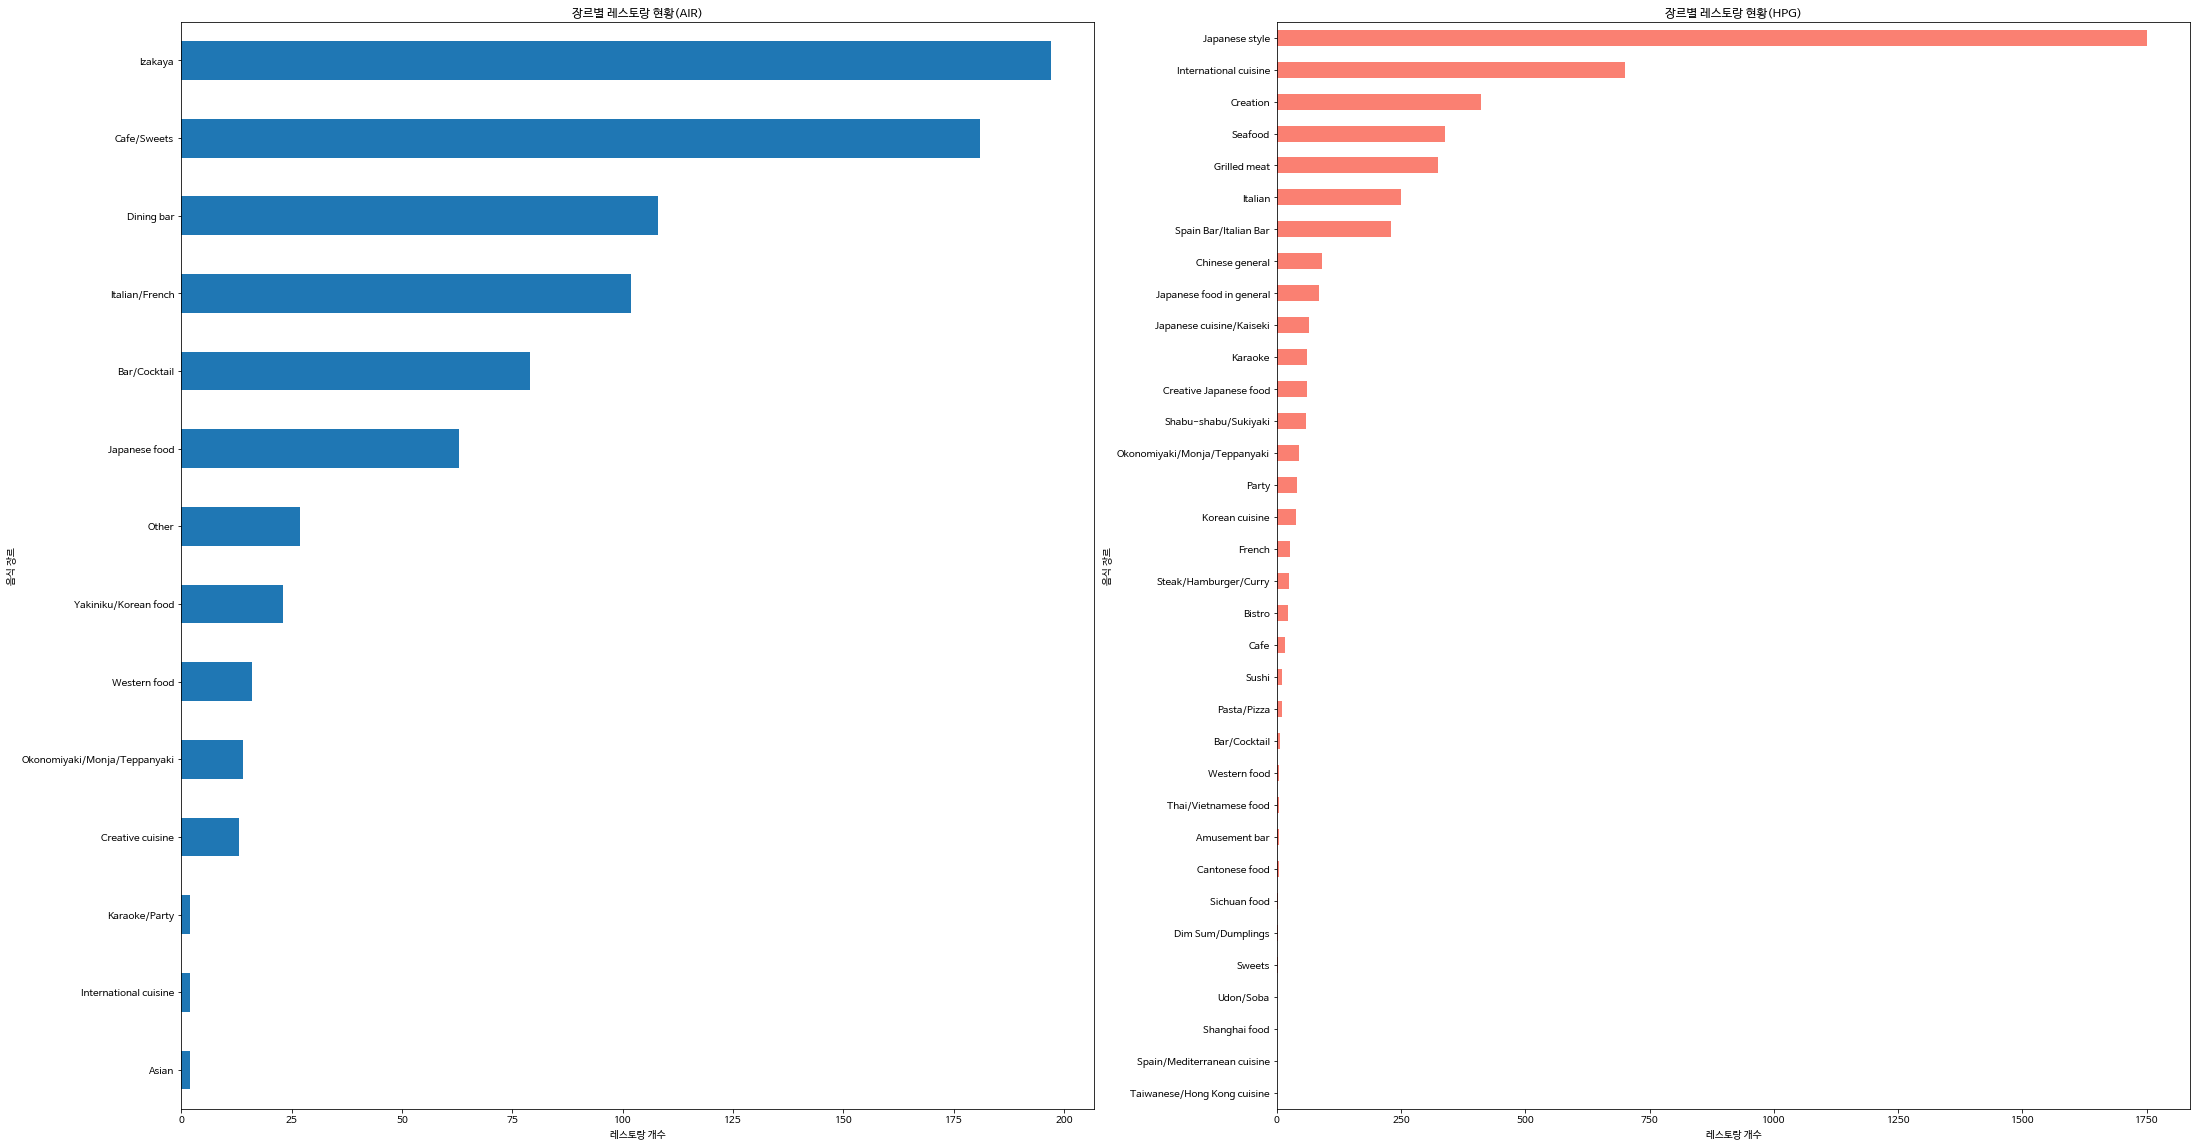

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(36,20))

air_genre = data['as'].groupby(['air_genre_name'])['air_genre_name'].count().sort_values()
air_genre.plot.barh(x='air_genre_name', ax=ax[0])
ax[0].set_title('장르별 레스토랑 현황(AIR)')
ax[0].set_xlabel('레스토랑 개수')
ax[0].set_ylabel('음식 장르')

hpg_genre = data['hs'].groupby(['hpg_genre_name'])['hpg_genre_name'].count().sort_values()
hpg_genre.plot.barh(x='hpg_genre_name', color='salmon', ax=ax[1])
ax[1].set_title('장르별 레스토랑 현황(HPG)')
ax[1].set_xlabel('레스토랑 개수')
ax[1].set_ylabel('음식 장르')


plt.show()

__시사점__
- AIR : 레스토랑을 14개의 카테고리로 분류하고 있다. 이자카야, 카페/디저트 레스토랑이 가장 많다.
- HPG : 레스토랑의 장르가 매우 다양하게 분류되어 있다.

__고객들이 가장 많이 찾는 레스토랑 Genre는?__

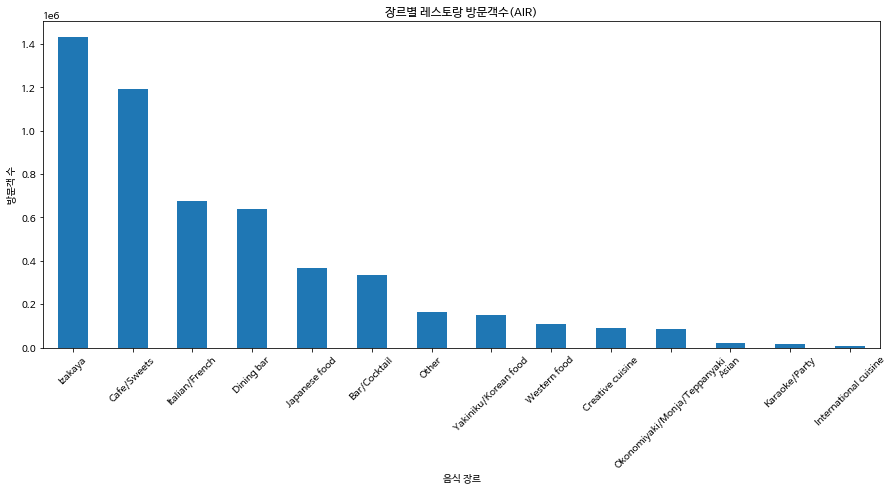

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(15,6))
air_genre = data['tra'].groupby(['air_genre_name'])['visitors'].sum().sort_values(ascending=False)
air_genre.plot.bar(x='air_genre_name', ax=ax)

plt.title('장르별 레스토랑 방문객수(AIR)')
plt.xticks(rotation=45)
plt.xlabel('음식 장르')
plt.ylabel('방문객 수')
plt.show()

__시사점__
- Market share와 실제 방문객 수를 비교 했을 때 약간의 순위 차이가 존재하긴 하지만 수요와 공급이 비례하게 나타나는 것 같다.
  - Market share : Izakaya > Cafe/Sweets > Dining bar > Italian/French > Bar/Cocktail > Japanese food 순
  - __장르별 레스토랑의 방문객 : Izakaya > Cafe/Sweets > Italian/French > Dining bar > Japanese food > Bar/Cocktail__ 순
- Western, Asian, International cuisine 등은 일본인들에게 별로 인기가 없는 편이다.
- 만약 골든위크 기간에 Izakaya, Cafe/Sweets 등의 레스토링이 문을 닫는다면 방문객 수는 연말/연초 처럼 급감할 것이다.

## 참고문헌
- [Github: Case Study - 1 (Recruit Restaurant Visitor Forecasting)]('https://github.com/junaidnasirkhan/Restaurant-Visitor-Forecasting/blob/master/Restaurant%20Visitor%20Forecasting.ipynb')
- [Kaggle: 
Restaurant Visitor Forecasting EDA with R (한글 번역)]('https://www.kaggle.com/maestroyi/restaurant-visitor-forecasting-eda-with-r?fbclid=IwAR2Xjy5JGKuogn0H2bMMdthC1TFkbZQY5MJe_Mv7Y7eksVj9BQbEdFWTTQ0')
